Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


# Задание 1: Общая связь между жесткостью воды и смертностью

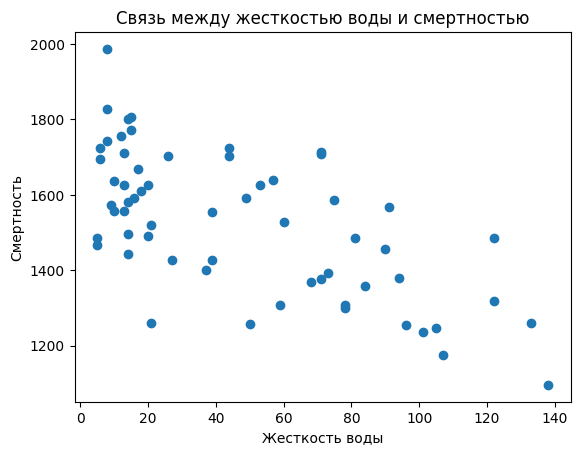

In [ ]:
# Построение точечного графика
plt.scatter(df['hardness'], df['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Связь между жесткостью воды и смертностью')
plt.show()

В точечном графике наблюдается обратная линейная зависимость смертности населения Южных и Северных территорий от степени жёсткости воды. Чем меньше степень жёсткости воды, тем больше смертность.

In [ ]:
# Расчет коэффициентов корреляции Пирсона и Спирмена
pearson_corr = df['hardness'].corr(df['mortality'])
spearman_corr = df['hardness'].corr(df['mortality'], method='spearman')
print('Коэффициент корреляции Пирсона:', pearson_corr)
print('Коэффициент корреляции Спирмена:', spearman_corr)

Коэффициент корреляции Пирсона: -0.6548486232042463
Коэффициент корреляции Спирмена: -0.6316646189166502


In [ ]:
# Построение модели линейной регрессии
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Расчет коэффициента детерминации
r2_score = model.score(X_test, y_test)
print('Коэффициент детерминации:', r2_score)

Коэффициент детерминации: 0.5099679408034544


Коэффициент детерминации имеет низкое значение.

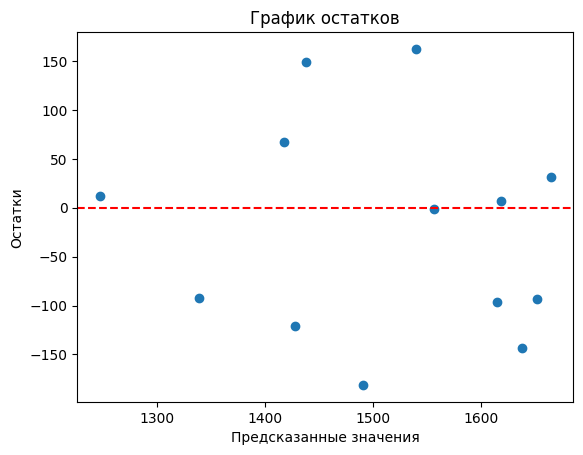

In [ ]:
# Построение графика остатков
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Из визуализации остатков видна хаотичность их значений.

В целом зависимость смертности от жесткости воды наблюдается.

# Задание 2: Зависимость для северных и южных городов

In [ ]:
# Разделение данных на 2 группы: северные и южные города
north_cities = df[df['location'] == 'North']
south_cities = df[df['location'] == 'South']

Анализ для северных городов

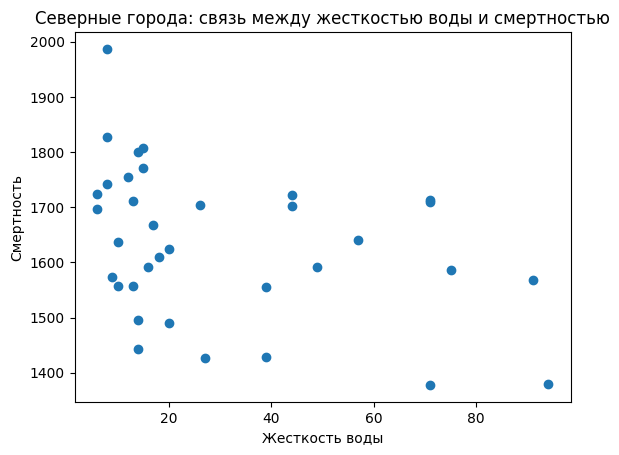

In [ ]:
plt.scatter(north_cities['hardness'], north_cities['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Северные города: связь между жесткостью воды и смертностью')
plt.show()

In [ ]:
pearson_corr_north = north_cities['hardness'].corr(north_cities['mortality'])
spearman_corr_north = north_cities['hardness'].corr(north_cities['mortality'], method='spearman')
print('Северные города:')
print('Коэффициент корреляции Пирсона:', pearson_corr_north)
print('Коэффициент корреляции Спирмена:', spearman_corr_north)

Северные города:
Коэффициент корреляции Пирсона: -0.3685978383288718
Коэффициент корреляции Спирмена: -0.4042078956511175


In [ ]:
X_north = north_cities[['hardness']]
y_north = north_cities['mortality']
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X_north, y_north, test_size=0.2, random_state=42)

model_north = LinearRegression()
model_north.fit(X_train_north, y_train_north)

LinearRegression()

In [ ]:
r2_score_north = model_north.score(X_test_north, y_test_north)
print('Коэффициент детерминации для северных городов:', r2_score_north)

Коэффициент детерминации для северных городов: -0.18101539518829401


Коэффициент детерминации, рассчитанный для городов северного региона, имеет отрицательное значение. Разработанная модель дает прогноз хуже, чем просто среднее значение. Данная модель не подходит для практического использования.

In [ ]:
y_pred_north = model_north.predict(X_test_north)
residuals_north = y_test_north - y_pred_north

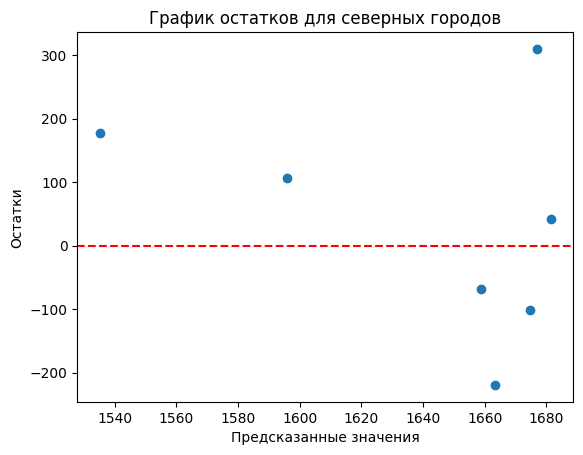

In [ ]:
plt.scatter(y_pred_north, residuals_north)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков для северных городов')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Анализ для южных городов (аналогично северным)

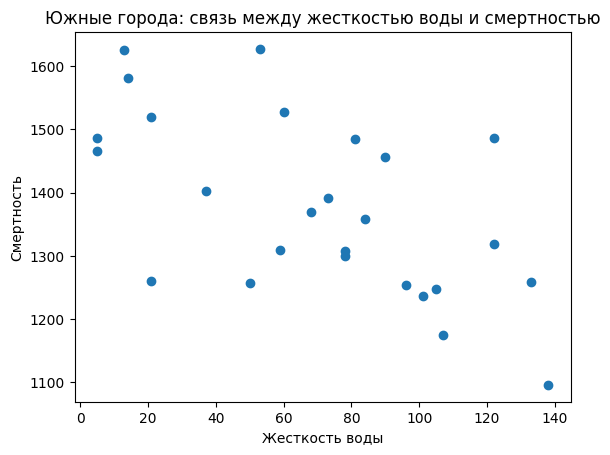

In [ ]:
plt.scatter(south_cities['hardness'], south_cities['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Южные города: связь между жесткостью воды и смертностью')
plt.show()

На графике зависимости смертности от жесткости воды на южной территории связь, так же, наблюдается, но распределение менее плотное, что связано с тем, что мы урезали данные.

In [ ]:
pearson_corr_south = south_cities['hardness'].corr(south_cities['mortality'])
spearman_corr_south = south_cities['hardness'].corr(south_cities['mortality'], method='spearman')
print('Южные города:')
print('Коэффициент корреляции Пирсона:', pearson_corr_south)
print('Коэффициент корреляции Спирмена:', spearman_corr_south)

Южные города:
Коэффициент корреляции Пирсона: -0.6021532715484156
Коэффициент корреляции Спирмена: -0.5957229185013566


In [ ]:
X_south = south_cities[['hardness']]
y_south = south_cities['mortality']
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X_south, y_south, test_size=0.2, random_state=42)
model_south = LinearRegression()
model_south.fit(X_train_south, y_train_south)


LinearRegression()

In [ ]:
r2_score_south = model_south.score(X_test_south, y_test_south)
print('Коэффициент детерминации для южных городов:', r2_score_south)

Коэффициент детерминации для южных городов: -1.9300174406554644


Коэффициент детерминации, рассчитанный для городов южного региона, имеет отрицательное значение. Разработанная модель дает прогноз хуже, чем просто среднее значение. Данная модель не подходит для практического использования.

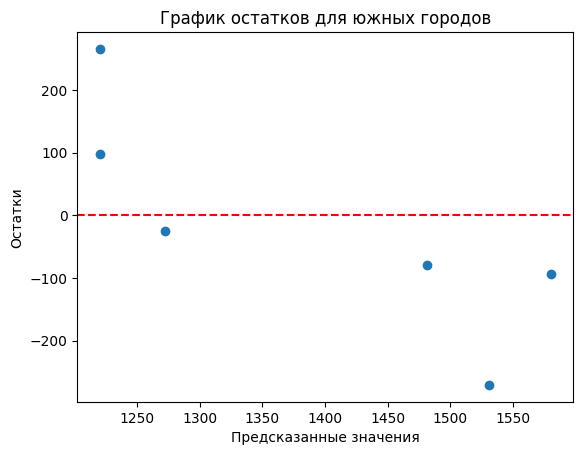

In [ ]:
y_pred_south = model_south.predict(X_test_south)
residuals_south = y_test_south - y_pred_south

plt.scatter(y_pred_south, residuals_south)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков для южных городов')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

В разделенных данных, на юг и север, наблюдается меньшая плотность распределения величин, коэфф-ты корреляции (особенно север) уменьшились, значения коэфф-в детерминации стали с отрицательными значениями, соответственно и качество моделей ухудшилось (по сравнению с моделью, построенной на данных до разбивки на север и юг).

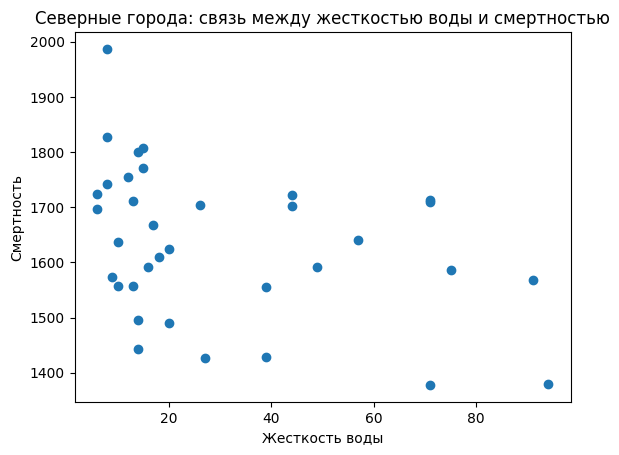

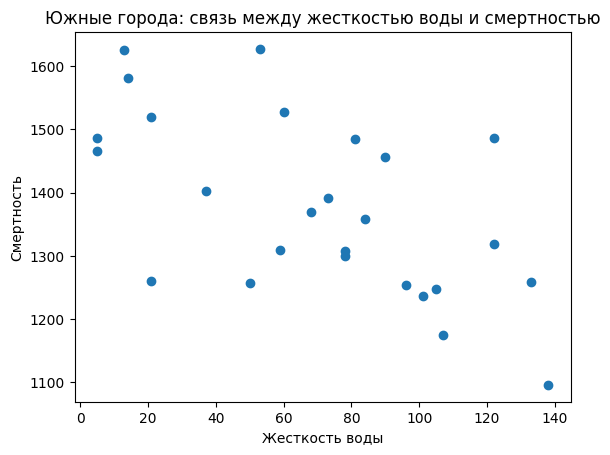

In [ ]:
plt.scatter(north_cities['hardness'], north_cities['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Северные города: связь между жесткостью воды и смертностью')
plt.show()

plt.scatter(south_cities['hardness'], south_cities['mortality'])
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Южные города: связь между жесткостью воды и смертностью')
plt.show()

Сравнивая графики построенные на данных после разделения на север и юг видно, что на графике южной территории данные распределены равномерно, а на севере наблюдается более плотное распределение данных с малой стпенью жесткости воды и большей смертностью. Соответственно, можно сказать, что на севере больше локаций с маленькой степенью жесткости воды.